<a href="https://colab.research.google.com/github/ofunkey/Time_Series_Data/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Data**

### **Problem Description**
- Build models to forecast the number of passengers for an airline


##**Time Series Data**

###**What is Time Series?**
- Time series is a sequence of observations **indexed** in **equi-spaced time intervals**. The time order can be hourly, daily, weekly, monthly, quarterly or yearly.

- The simplest example of a time series that all of us come across on a day to day basis is the change in temperature throughout the day or week or month or year.

**Time Series forecasting** is the process of using a statistical model to predict future values of a time series based on past results

- The ability to make predictions based upon historical observations creates a competitive advantage. For example, if an organization has the capacity to better **forecast** the sales quantities of a product, it will be in a more favourable position to optimize inventory levels. This can result in an increased liquidity of the organizations cash reserves, decrease of working capital and improved customer satisfaction by decreasing the backlog of orders.



### **Application of Time Series**
* Financial Analysis − sales forecasting, inventory analysis, stock market analysis, price estimation.

* Weather Analysis − temperature estimation, climate change, seasonal shift recognition, weather forecasting.

* Network Data Analysis − network usage prediction, anomaly or intrusion detection, predictive maintenance.

* Healthcare Analysis − census prediction, insurance benefits prediction, patient monitoring.


###**Components of Time Series:**

- **Trend:** It is the increasing or decreasing behavior of a variable over a **long period of time**. A trend can be increasing (upward), decreasing (downward), or horizontal (stationary).

- **Seasonality:** The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. An example is an increase in the number of airline passengers during holidays each year. **(over a fixed time)**

- **Cyclical Component:** These are the trends with no set repetition over a particular period of time. These are long term business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series. **(No fixed time)**

- **Irregular Variation:** These are the fluctuations in the time series data become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random. It is the error in the observations added due to environmental factors. Example, flood, famine, war, earth etc.

A time series may not have a distinct trend but have a seasonality. The opposite can also be true.


###**Models of Time Series Analysis**

|Smoothing Models  |   
|---|
| Moving Average (Simple & Weighted)  |  
| Single Exponential Smoothing   |
| Double Exponential Smoothing  |
| Triple Exponential Smoothing  |

<br>

|Decompostion Models  |   
|---|
| Models generally used for decomposition of time series into its four components.
It estimate and separate the four types of variations and bring out the relative impact of each on the overall behavior of the time series.  | 
| **ETS Decomposition** is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.  |

<br>

|        **Additive model**             |  | **Multiplicative model**       |
|---------------------------------------|--|--------------------------------|
|      $Y_t = T_t + S_t + C_t + E_t $   |  | $Y_t = T_t * S_t * C_t * E_t$  |   

<br>

|**Types of Models**   |   
|---|  
| Auto Regression Moving Average (ARMA)  |
| Auto Regressive Integrated Moving Average(ARIMA)  |
| Seasonal Auto Regressive Integrated Moving Average(SARIMA)  |
| Vector Auto-Regression(VAR)  |
| Vector Auto-Regression Moving-Average(VARMA)  | 


## Data Loading

**Dataset**

The dataset we will be using is a univariate time series listing the number of passengers boarding an aircraft per month from 1949 to 1960 (over 12 year period). The dataset can be downloaded from the kaggle − https://www.kaggle.com/rakannimer/air-passengers.

**Let's get started**

### Load dataset

Steps to access, download, and use the dataset:

1.   Access the above link, and click on "Download" to download the dataset.
2.   Once downloaded, click on the file to unzip it and save the file in a folder that is easily accessible, for example: "Documents"
3.   Open a Google Colab Notebook.
4.   On the left pane of the Google Colab, click on "Files" and select the upload icon (Icon hover text: "Upload to session storage")

    *(Reminder, uploaded files will get deleted when this runtime is recycled.)*
5.   You now are ready to start using the data in the Colab Notebook!

Data location within Colab: '/content/AirPassengers.csv'

Get the location of google colab folder - the path of the current working directory

In [1]:
pwd

'/content'

This will list the files in the folder, to ensure the data in step 4 is corrected loaded.

In [2]:
ls

AirPassengers.csv  sample_data/


In [3]:
# Import libraries

import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6


In [4]:
# Load the data as a Pandas dataframe
airline = pd.read_csv('/content/AirPassengers.csv')


## Data Exploring 

Understanding the data, its features and make sense of what the data looks like

In [5]:
# Prints the number of rows and columns of the dataset
num_row, num_col = airline.shape
print(f'There are {num_row} row(s) and {num_col} column(s)')

# Prints first 5 rows of the DataFrame
airline.head()

There are 144 row(s) and 2 column(s)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
# Prints last 5 rows of the DataFrame
airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
# Prints the index, datatype and memory information. We also get the number of columns, check if null values exist and the data types
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Great!, there are no null values in this dataset. <br>
In time series, we need to make sure there are no null values in the dataset; if there are, we can replace them with either 0 or average or preceding or succeeding values. Replacing is a preferred choice over dropping so that the continuity of the time series is maintained.

We also observed the data type of the month column is string, we need to convert it to datetime.

In [8]:
# Rename the columns
airline = airline.rename(columns = {'Month': 'Date','#Passengers':'Num_of_Passengers'})

In [9]:
# Convert the date from string to datetime, it's time series!
airline['Date'] = pd.to_datetime(airline['Date'])
airline['Date'].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Date, dtype: datetime64[ns]

Now, the data type for 'Date' column is in datetime format.

In [10]:
# Extract the month and year, create month and year columns
airline['Month'], airline['Year'] = airline['Date'].dt.month, airline['Date'].dt.year
airline.head()

,Date,Num_of_Passengers,Month,Year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949


In [11]:
# Convert month to calendar month abbreviation
import calendar
airline['Month'] = airline['Month'].apply(lambda x: calendar.month_abbr[x])
airline.head()

,Date,Num_of_Passengers,Month,Year
0,1949-01-01,112,Jan,1949
1,1949-02-01,118,Feb,1949
2,1949-03-01,132,Mar,1949
3,1949-04-01,129,Apr,1949
4,1949-05-01,121,May,1949


In [12]:
# Set date as the index and print first 5 rows to view that month is indexed
airlineIndex = airline.set_index('Date', inplace=True)
airline.head()

,Num_of_Passengers,Month,Year
Date,,,
1949-01-01,112,Jan,1949
1949-02-01,118,Feb,1949
1949-03-01,132,Mar,1949
1949-04-01,129,Apr,1949
1949-05-01,121,May,1949


In [13]:
# Summary statistics for numerical column
airline.describe()

,Num_of_Passengers,Year
count,144.000000,144.000000
mean,280.298611,1954.500000
std,119.966317,3.464102
min,104.000000,1949.000000
25%,180.000000,1951.750000
50%,265.500000,1954.500000
75%,360.500000,1957.250000
max,622.000000,1960.000000


## Time series steps

**Steps in processing Time Series Data**

![steps in TS.JPG](https://user-images.githubusercontent.com/49927264/93833670-42187c80-fc47-11ea-93fa-66a394174326.png)

### Step 1: Visualize the Time Series

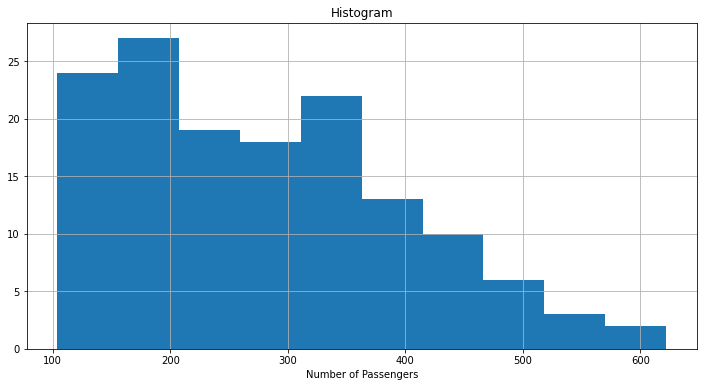

In [14]:
# Plot histogram to show the distribution of the dataset
airline['Num_of_Passengers'].hist()
plt.xlabel('Number of Passengers')
plt.title('Histogram');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


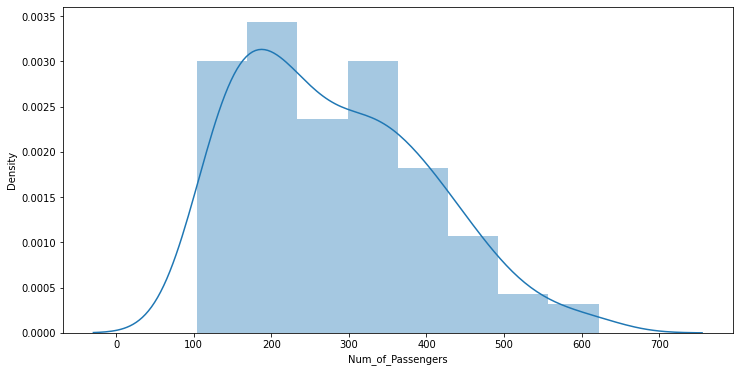

In [15]:
# Show the density distribution
sns.distplot(airline['Num_of_Passengers'])

From the density plot, we don't have a normal distibution.

Text(0, 0.5, 'Number of Air Passengers')

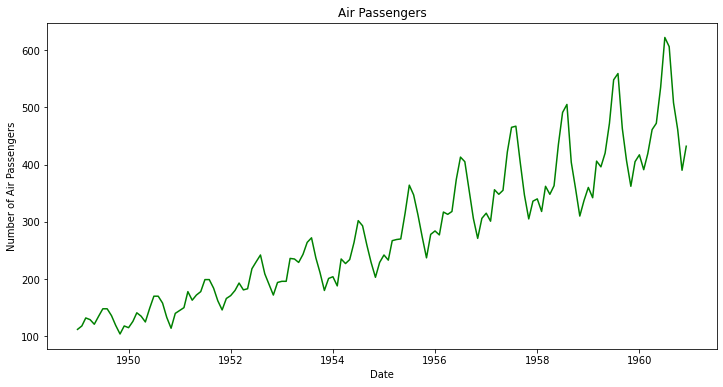

In [16]:
# Plot air passengers data as time series 
plt.plot(airline.Num_of_Passengers, color='green')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')

**Observation:**
Reviewing the plot of the time series, we can see that there is an obvious upward trend components, seasonality component with a cycle less than 12 months. The time series is not stationary.

Text(0, 0.5, 'Number of Air Passengers')

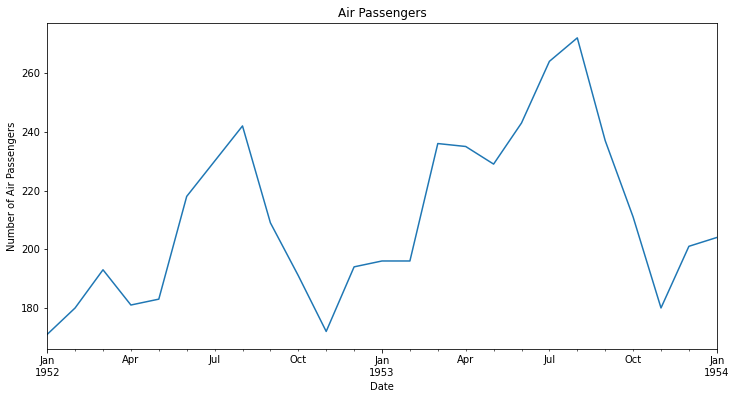

In [17]:
# Let's take a closer look at the patterns from Jan 1952 to Jan 1954
#plt.plot(airline.Num_of_Passengers[36:61])
airline.Num_of_Passengers[36:61].plot()
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')

**Observation**: Seasonality - Notice a repeating pattern starting from the beginning of year, the number of passengers increases and drops towards the end of the year. It's at peak around July - August and drops around Nov of each year. 

Next, let's plot a stacked annual plot to observe seasonality in the times series data.

In [18]:
# Re-organize the time series to observe the seasonality
cm = sns.light_palette('#2ecc71', as_cmap=True)

monthly_airline = pd.pivot_table(airline, values = 'Num_of_Passengers', columns = 'Year', index = 'Month')
monthly_airline.style.background_gradient(cmap=cm)

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Apr,129,135,163,181,235,227,269,313,348,348,396,461
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Dec,118,140,166,194,201,229,278,306,336,337,405,432
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Mar,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


In [19]:
# Re-arrange the oder of the index
monthly_airline = monthly_airline.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_airline.style.background_gradient(cmap=cm)

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


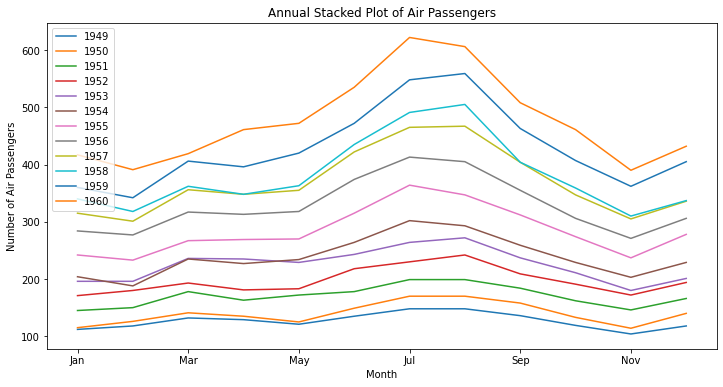

In [20]:
# Plot a stacked annual plot to understand pattern
monthly_airline.plot()
plt.title('Annual Stacked Plot of Air Passengers')
plt.ylabel('Number of Air Passengers')
plt.legend(loc='best')

In [21]:
# Re-organize, transform column into rows and vice-versa
monthly_airline2 = pd.pivot_table(airline, values = 'Num_of_Passengers', columns = 'Month', index = 'Year')
monthly_airline2 = monthly_airline2[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_airline2.style.background_gradient(cmap=cm)

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


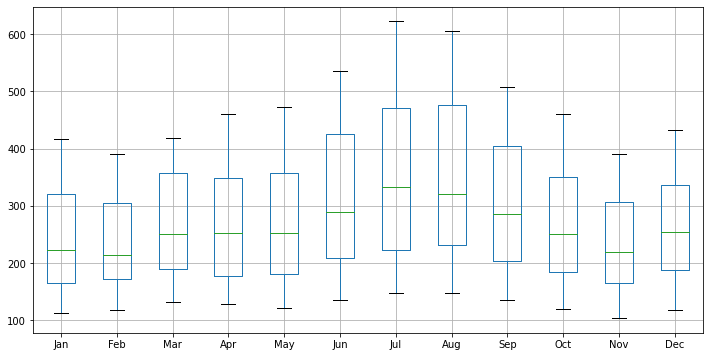

In [22]:
# Plot boxplots to check for outliers and observe seasonal cycle
monthly_airline2.boxplot()

There are no outliers in this graph. However, July and August are peak months. Also, the variance values are much higher in July and August when compared with other months.

Another quick camparison of the mean and variance over time.

In [23]:
# Split our dataset in two groups, calculate the mean and variance for each group
split = round(len(airline.Num_of_Passengers) / 2)
airline1, airline2 = airline.Num_of_Passengers[0:split], airline.Num_of_Passengers[split:]
mean1, mean2 = airline1.mean(), airline2.mean()
std1, std2 = airline1.std(), airline2.std()

print('Mean1 = %f, Mean2 = %f' % (mean1, mean2))
print('Stardard deviation1 = %f, Stardard deviation2 = %f' % (std1, std2))

Mean1 = 182.902778, Mean2 = 377.694444
Stardard deviation1 = 47.704241, Stardard deviation2 = 86.439206


The mean and variance of the splitted data keeps increasing with time, not constant. This suggest that the time series is **non stationary**.

But first, lets split the dataset into train and test dataset.

In [24]:
# Drop columns 'Month' and 'Year'
airline = airline.drop(columns= ['Month','Year'])
airline.head()

,Num_of_Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
# Split time series data into train and test dataset 
split_size = int(len(airline) * 0.67) # Splitting in such a way to have complete years
train, test = airline[0:split_size], airline[split_size:]

print(f'The size of the train data is: {train.size} and \nThe size of the test data is: {test.size}')

The size of the train data is: 96 and 
The size of the test data is: 48


In [26]:
# Print first 5 rows of the train dataframe
train.head()

,Num_of_Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [27]:
# Print first 5 rows of the test dataframe
test.head()

,Num_of_Passengers
Date,
1957-01-01,315
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355


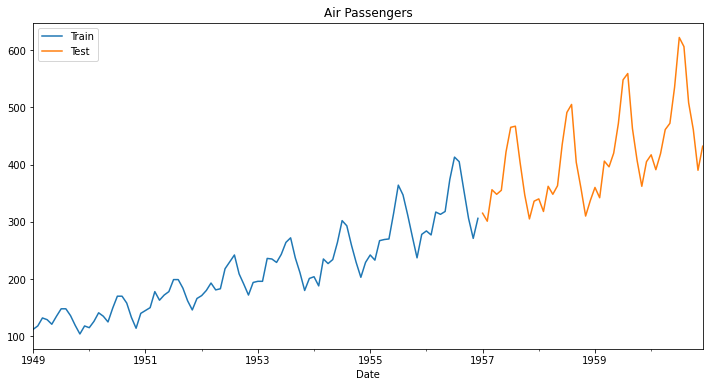

In [28]:
# Ok, let's plot the data to display the train and test data
train.Num_of_Passengers.plot(title = 'Air Passengers', legend = 'best', label = 'Train')
test.Num_of_Passengers.plot(title = 'Air Passengers', legend = 'best', label = 'Test')

Next, time series need to be stationarize in order for us to make forecast.

### Step 2: Stationarize the Series
  - Difference data to make data stationary on mean (remove the upward trend)
  - Log transform data to make data stationary on variance

**Before that, let's establish a base level forecast**


####Establish a base level forecast
- Most base level forecasts do not require data stationarity.

Let's take a look at different modeling techniques and their performance.

##### Naive Methods
These are simple estimation techniques. It assumes the predicted value at time $_{t-1}$ to be the actual value of the variable at time $_t$ or rolling mean of series. These are used for comparison with sophisticated modeling techniques performances


The Naive Forecast: 
            Num_of_Passengers_t  Num_of_Passengers_t-1
Date                                                  
1957-02-01                  301                  315.0
1957-03-01                  356                  301.0
1957-04-01                  348                  356.0
1957-05-01                  355                  348.0
1957-06-01                  422                  355.0
1957-07-01                  465                  422.0
1957-08-01                  467                  465.0
1957-09-01                  404                  467.0
1957-10-01                  347                  404.0
1957-11-01                  305                  347.0


Text(0.5, 1.0, 'Naive Forecast')

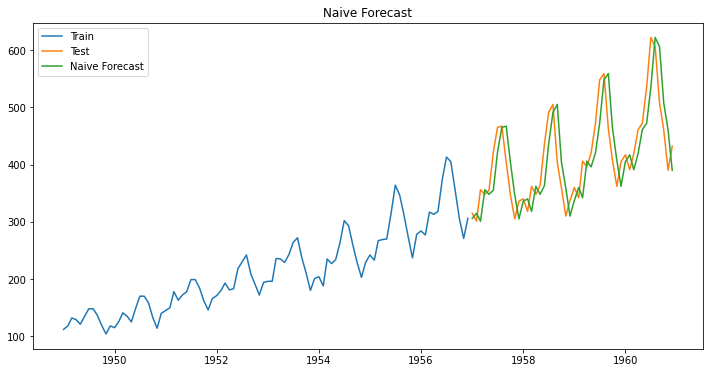

In [29]:
# Naive Method - Set the predicted value at present time equal to actual value at previous time
airline['Num_of_Passengers_t'] = airline['Num_of_Passengers'].copy()
airline['Num_of_Passengers_t-1'] = airline['Num_of_Passengers'].shift()
airline_naive = airline[['Num_of_Passengers_t','Num_of_Passengers_t-1']][1:]
print(f'The Naive Forecast: \n{airline_naive[len(train):].head(10)}')

forecast = test.copy()
forecast['Num_of_Passengers_t-1'] = airline['Num_of_Passengers_t-1'][len(train):]

#Plot Naive method 
plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(forecast['Num_of_Passengers_t-1'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

Naive - Previous value is the best reflector of the current value.

In [30]:
# Naive Method - Calculate RMSE to check to accuracy of our model on test data set
from sklearn.metrics import mean_squared_error
from math import sqrt

naive_rmse = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast['Num_of_Passengers_t-1']))
print('RMSE for Naive Method: ', naive_rmse)

RMSE for Naive Method:  48.04121494439263


With this basic technique, the error of any other model must be less than the basic model.

##### Smoothing Methods

  - Smoothing methods work as weighted averages. Forecasts are weighted averages of past observations. The weights can be uniform (this is a moving average), or exponential (giving more weight to recent observations and less weight to old observations). More advanced methods include other parts in the forecast, like seasonal and trend components.

##### Moving Average
Simple moving average model, forecast the next value(s) in a time series based on the average of a fixed finite number of the previous values.

In [31]:
# Rolling or Moving Average - Set the predicted value at present time to the rolling mean of the time periods preceding it
airline['Num_of_Passengers_roll_mean'] = airline['Num_of_Passengers_t'].rolling(window = 12).mean().shift()
#print(airline['Num_of_Passengers_roll_mean'].head(6))

# Drop NAN values
airline_naive2 = airline[['Num_of_Passengers_t','Num_of_Passengers_roll_mean']].dropna()

print(f'The Moving Average: \n{airline_naive2[len(train):].head(10)}')

# Create a forecast column to plot forecast data
forecast = test.copy()
forecast['Num_of_Passengers_rm'] = airline['Num_of_Passengers_roll_mean'][len(train):]

The Moving Average: 
            Num_of_Passengers_t  Num_of_Passengers_roll_mean
Date                                                        
1958-01-01                  340                   368.416667
1958-02-01                  318                   370.500000
1958-03-01                  362                   371.916667
1958-04-01                  348                   372.416667
1958-05-01                  363                   372.416667
1958-06-01                  435                   373.083333
1958-07-01                  491                   374.166667
1958-08-01                  505                   376.333333
1958-09-01                  404                   379.500000
1958-10-01                  359                   379.500000


Text(0.5, 1.0, 'Moving Average Forecast with 3 observations')

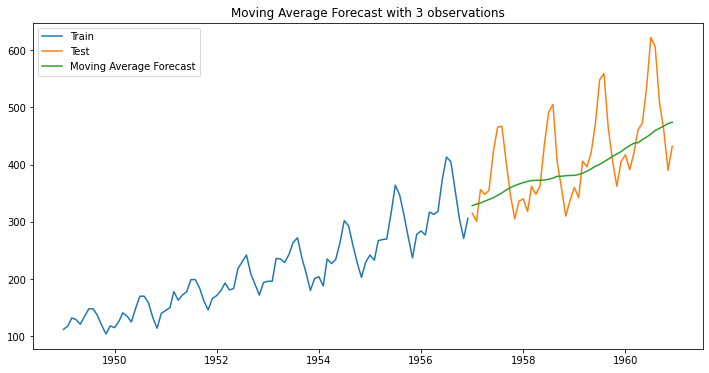

In [32]:
#Plot Rolling or Moving Average
plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(forecast['Num_of_Passengers_rm'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Forecast with 3 observations")

In [33]:
# Calculate RMSE to check to accuracy of our model on test data set
moving_rmse = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast['Num_of_Passengers_rm']))
print(f'The Moving Average RMSE is: {moving_rmse}')

The Moving Average RMSE is: 67.96426842398444


Here, the error increases, as the number of previous time periods also known as 'lags' increases (we used 12 lags here). However, if the lag is kept  at 1, the error is the same as the naive method used earlier.


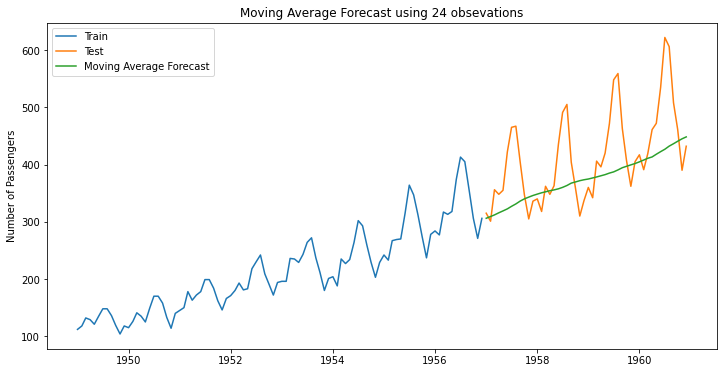

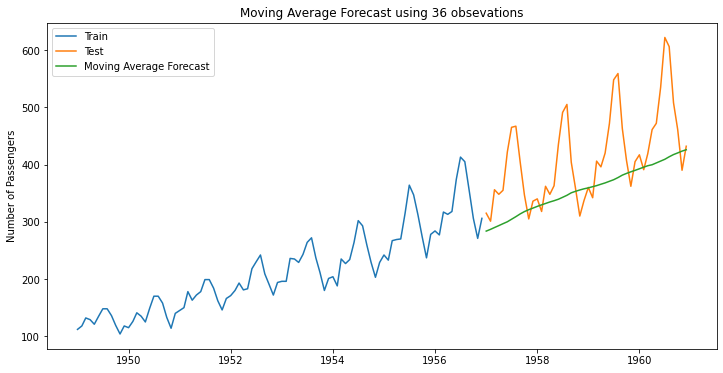

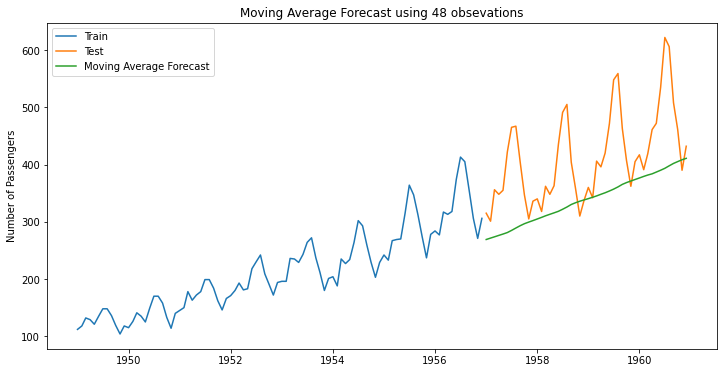

In [34]:
# Let's try with even more lags or number of previous time periods
for i in range(24, 50, 12):
  airline['Num_of_Passengers_roll_mean'] = airline['Num_of_Passengers_t'].rolling(i).mean().shift()
  airline_naive = airline[['Num_of_Passengers_t','Num_of_Passengers_roll_mean']].dropna()

  forecast = test.copy()
  forecast['Num_of_Passengers_rm'] = airline['Num_of_Passengers_roll_mean'][len(train):]

  plt.plot(train['Num_of_Passengers'], label='Train')
  plt.plot(test['Num_of_Passengers'], label='Test')
  plt.plot(forecast['Num_of_Passengers_rm'], label= 'Moving Average Forecast')
  plt.ylabel('Number of Passengers')
  plt.title('Moving Average Forecast using %s obsevations' %i)
  plt.legend(loc='best')
  plt.show()

In [35]:
# Calculate RMSE to check to accuracy of our model on test data set
from sklearn.metrics import mean_squared_error
from math import sqrt

moving_rmse2 = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast['Num_of_Passengers_rm']))
print(f'The Moving Average RMSE is: {moving_rmse2}')

The Moving Average RMSE is: 98.98708509583295


We can see that the predictions are getting weaker as we increase the number of observations.

#####Simple Exponential Smoothing - Weighted (SES)

Forecasts uses weighted averages of the previous level and the current observation, where the weights decrease exponentially as observations come from the past. A smoothing level denoted as α


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


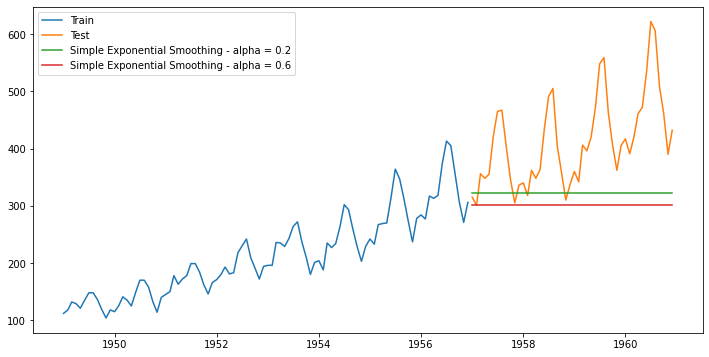

In [36]:
# Simple Exponential Smoothing - Weighted (SES)
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
forecast3 = test.copy()
forecast4 = test.copy()

fit3 = SimpleExpSmoothing((train['Num_of_Passengers']))
model_fit = fit3.fit(smoothing_level = 0.2, optimized = False)
forecast['SES 0.2'] = model_fit.forecast(len(test))

fit4 = SimpleExpSmoothing((train['Num_of_Passengers']))
model_fit = fit4.fit(smoothing_level = 0.6, optimized = False)
forecast['SES 0.6'] = model_fit.forecast(len(test))

plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(forecast['SES 0.2'], label='Simple Exponential Smoothing - alpha = 0.2')
plt.plot(forecast['SES 0.6'], label='Simple Exponential Smoothing - alpha = 0.6')

plt.legend(loc='best')

In [37]:
# Calculate RMSE to check to accuracy of our model on test data set
SES_rmse = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast['SES 0.2']))
SES_rmse1 = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast['SES 0.6']))
print(SES_rmse, SES_rmse1)

119.61718210550823 136.00335113464587


##### Holt's Linear Trend Model

This is an extention of simple exponential smoothing to allow forecasting of data with trend (a function of level and trend). Smoothing level α, smoothing slope β 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


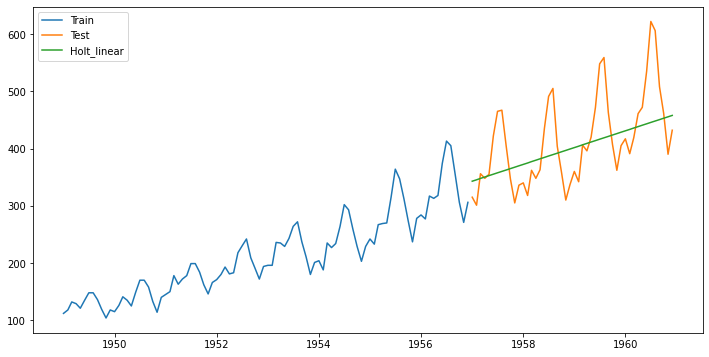

In [38]:
# Holt's Linear Trend Model
forecast5 = test.copy()
fit1 = Holt((train['Num_of_Passengers'])).fit(smoothing_level = 0.2,smoothing_slope = 0.1)
forecast5['Holt_linear'] = fit1.forecast(len(test))

plt.plot(train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(forecast5['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')

In [39]:
# Calculate RMSE to check to accuracy of our model on test data set
holtL_rmse = sqrt(mean_squared_error(test.Num_of_Passengers, forecast5.Holt_linear))
print(holtL_rmse)

66.48562230277889


##### Holt-Winters Method

This model takes into account for trends and /or seasonality.

The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level C $ℓ_t$, one for trend $b_t$ and one for the seasonal component denoted by $s_t$, with smoothing parameters α, β and γ.



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


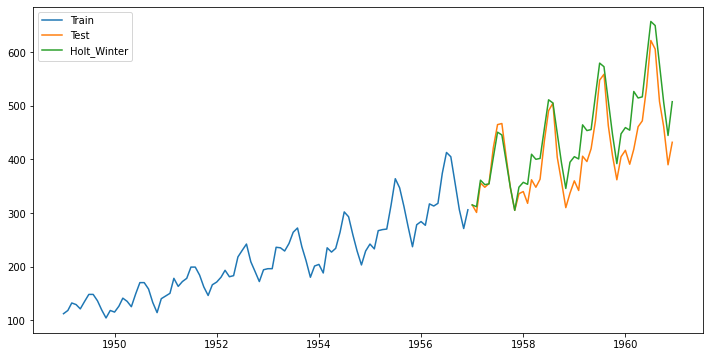

In [40]:
# Holt-Winters Method
forecast1 = test.copy()
model = ExponentialSmoothing((train['Num_of_Passengers']),seasonal_periods=12 ,trend='mul', seasonal='mul')
model_fit = model.fit()
forecast1['Holt_Winter'] = model_fit.forecast(len(test))

plt.plot( train['Num_of_Passengers'], label='Train')
plt.plot(test['Num_of_Passengers'], label='Test')
plt.plot(forecast1['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [41]:
# Calculate RMSE to check to accuracy of our model on test data set
holtW_rmse = sqrt(mean_squared_error(test['Num_of_Passengers'], forecast1['Holt_Winter']))
print(holtW_rmse)

42.23906939374148


In [42]:
print('RMSE for Naive Method: %.4f'% naive_rmse)
print('RMSE for Moving Average: %.4f'% moving_rmse)
print('RMSE for Simple Exponential Smoothing: %.4f'% SES_rmse)
print('RMSE for Holts Linear: %.4f'% holtL_rmse)
print('RMSE for Holts Winters: %.4f'% holtW_rmse)

RMSE for Naive Method: 48.0412
RMSE for Moving Average: 67.9643
RMSE for Simple Exponential Smoothing: 119.6172
RMSE for Holts Linear: 66.4856
RMSE for Holts Winters: 42.2391


From the above results, clearly the rmse value for Holts Winters Method is the least and so the best modelling technique. The RMSE variation is dependent on the dataset.

**Let's go back the visualization, to understand the issues with the time series.**


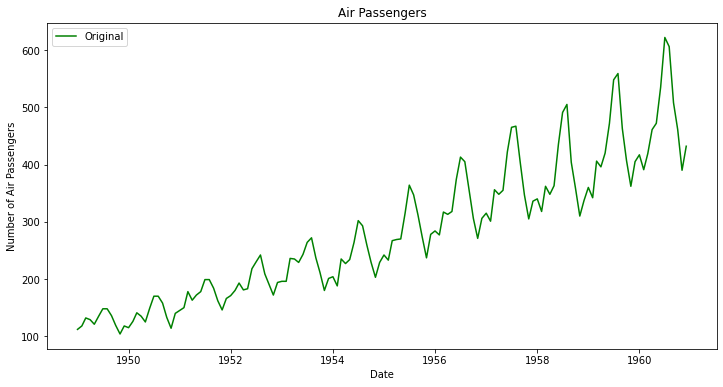

In [43]:
# Plot air passenger data as time series
plt.plot(airline['Num_of_Passengers'], color='green', label='Original')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.legend(loc='best')

With an obvious trend component, seasonality component with a cycle less than 12 months, and the variance in the dataset keeps increasing with time, we definately need to make this time series stationary.

Time series is stationary if its statistical properties, mean, variance remain **constant** over time and autovariance **does not depend on time.** 

It helps in making better forecasting. 


####  Checks for Stationarity 
There are two statistical tests to test stationarity: Rolling Statistics and Statistical Tests

|**Rolling Statistics**      ||**Statistical Test**     |
|-----||-----|
|Plot and review the rolling statistics - Rolling average and standard deviation      ||Augmented Dickey – Fuller test (ADF Test) - Confirmatory evidence that time series is stationary or non-stationary     |
|     ||Null hypothesis (H0) - the time series has a unit root, is **non-stationary**. It has **some time dependent structure**.     |
|     ||Alternate hypothesis (H1) - rejecting the null hypothesis -meaning the time series does not have a unit root,is **stationary**. It does **not have time-dependent structure**.     |
|     ||* If 'Test Statistic' < 'Critical Value', reject the null hypothesis, the time series is stationary.  |
|     ||    or |
|     || p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary    |
|     || p-value <= 0.05: Reject the null hypothesis (H1), the data does not have a unit root and is stationary.    |

<br>


In [44]:
# This test stationarity function combines the two tests into one 

from statsmodels.tsa.stattools import adfuller

# Declare the function for test
def test_stationarity(timeseries):
    
    #1. Rolling Statistics
    # Determine rolling statistics
    roll_mean = timeseries.rolling(window = 12).mean()
    roll_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics
    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(roll_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(roll_std, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()
    
    #2. Statistical test
    # Perform Augmented Dickey–Fuller test (ADF test)
    print('Results of Dickey-Fuller Test:')
    adf_test = adfuller(timeseries)
    adf_output = pd.Series(adf_test[0:4], index=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' %key] = value
    print(adf_output)

In [45]:
# For illustration purpose - Print the rolling mean and rolling standard deviation  
# Determine Rolling Statistics -  
# Window = 12 implies 12 months, this gives a rolling mean at yearly level, this will smoothen the curve  

# Rolling mean
roll_mean = airline['Num_of_Passengers'].rolling(window=12).mean()

# Rolling standard deviation
roll_std = airline['Num_of_Passengers'].rolling(window=12).std()

roll_stats= pd.concat([roll_mean, roll_std],axis=1)
roll_stats.columns = [['roll_mean', 'roll_std']]
roll_stats.head(15)


,roll_mean,roll_std
Date,,
1949-01-01,NaN,NaN
1949-02-01,NaN,NaN
1949-03-01,NaN,NaN
1949-04-01,NaN,NaN
1949-05-01,NaN,NaN
1949-06-01,NaN,NaN
1949-07-01,NaN,NaN
1949-08-01,NaN,NaN
1949-09-01,NaN,NaN


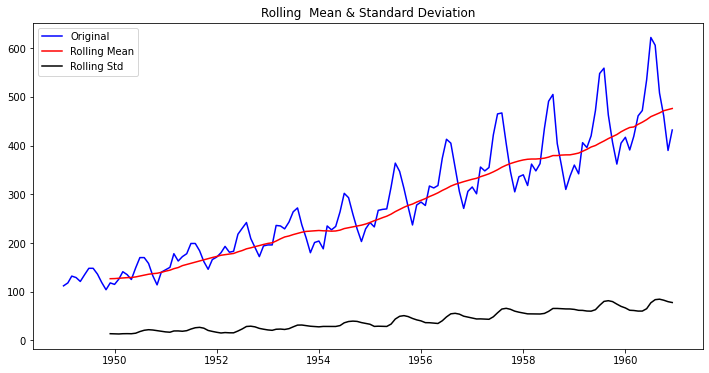

Results of Dickey-Fuller Test:
ADF Test Statistic               0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [46]:
# Call test_Stationary function that to determine the rolling statistics and run the Augmented Dickey–Fuller test
airline_ts = airline['Num_of_Passengers'] # original dataset
test_stationarity(airline_ts)

The mean and standard deviation values are not constant, both vary with time. 

From the result of the Dickey-Fuller test, the ADF Test Statistic value is **greater** than the the critical values and the p-value is **greater** than 0.05, so we fail to reject the null hypothesis. This time series is **non stationary**.

Note that we have the options of either using the critical values or p-value to evaluate the result of the test. Going forward, I will focus on using critical values comparison.

This time series may indicate an exponential growth from season to season. For example, log transform can be used to flatten out exponential change back to a linear relationship.


There are varieties of techniques that can be use to transform a non stationary time series to stationary time series. In some cases, a combination of the techniques can be used to stationarize the time.
* Log transformation (or other power transformations - square root, cube root, 
etc) to remove unequal variances
* Differencing of time series (to address or remove trend component)
  * Simple moving averages
  * Exponential moving averages
  * Previous values
* Seasonal Decompostion


For this time series, let's try some of the techniques we have discussed and observed the output.

##### A. Log Transformation

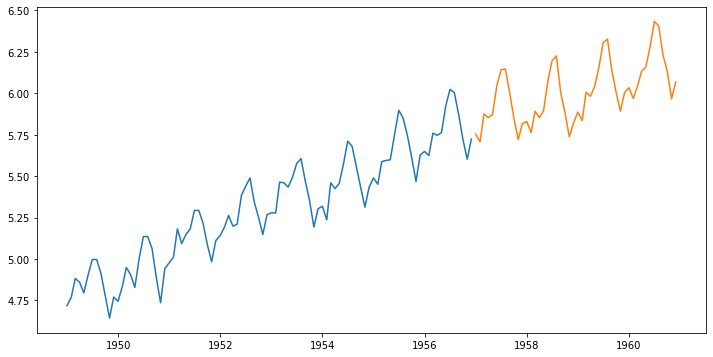

In [47]:
# Take the log transform of the series to remove unequal variances (stationarize the variance)
train_log, test_log = np.log(train['Num_of_Passengers']), np.log(test['Num_of_Passengers']) 
train_log.head()
plt.plot(train_log)
plt.plot(test_log)

Here, the unequal variance has been removes but the time series is still treading.

Next, let's use some trend reduction techniques with the log tansform data to stationarize mean and variance.


##### B. Difference with trend reduction techniques 

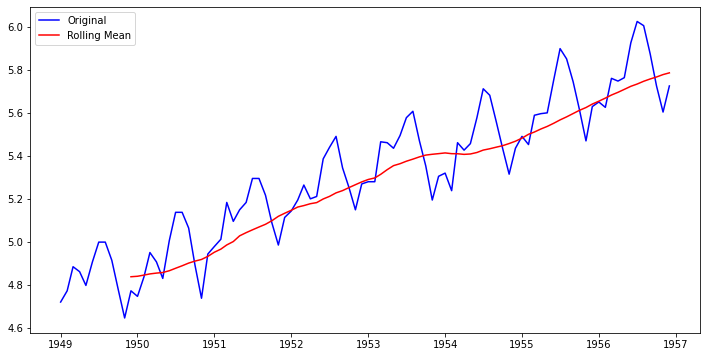

In [48]:
## 1. Simple Moving Average
moving_avg = train_log.rolling(window = 12).mean()
plt.plot(train_log, color = 'blue', label = 'Original')
plt.plot(moving_avg, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best') 
#plt.show()

Now, the unequal variance is remove but we can observe an increasing trend in the plot. We need to remove the increasing trend in order to make the time series stationary. 

In [49]:
# Let's take the difference between the moving average and the actual number of passengers of the time series
train_log_moving_avg_diff = train_log - moving_avg
train_log_moving_avg_diff.head(12)

# Drop all nan values
train_log_moving_avg_diff.dropna(inplace = True)
train_log_moving_avg_diff.head(12)

Date
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
1950-09-01    0.162937
1950-10-01   -0.018578
1950-11-01   -0.180379
Name: Num_of_Passengers, dtype: float64

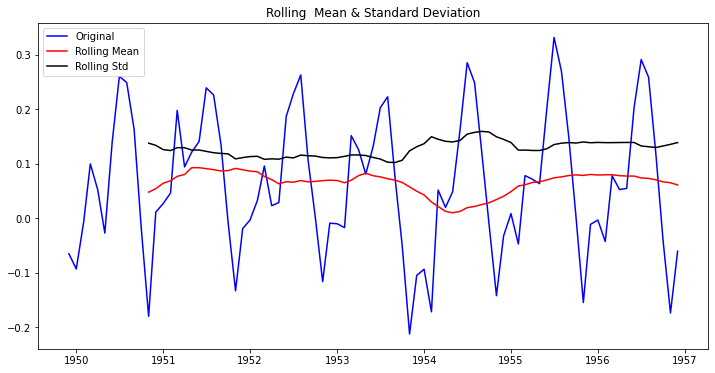

Results of Dickey-Fuller Test:
ADF Test Statistic             -1.910930
p-value                         0.326937
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [50]:
# Check test stationarity for the simple moving average technique
test_stationarity(train_log_moving_avg_diff)

The rolling mean and standard deviation appear to vary very **slightly**. This is much better than the original time series. 

The test statistic is **smaller** than 5% of the critical values, this means we can say that "with 95% confidence that trend is also removed. The p-value is relatively less compared to the initial value without log transformation.

(<matplotlib.legend.Legend at 0x7f70fcd27d68>,)

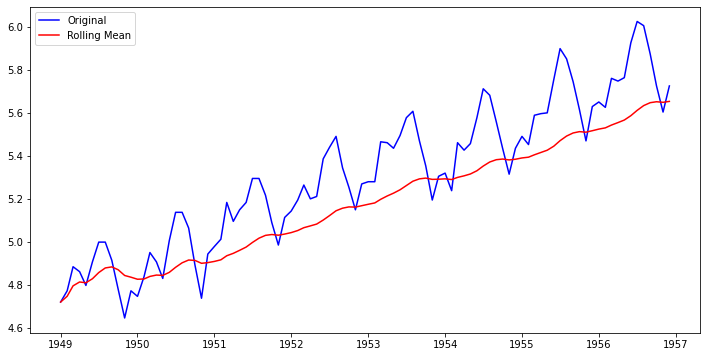

In [51]:
# 2. Exponentially Weighted Moving Average
exp_weighted_moving_avg = train_log.ewm(halflife = 12).mean()
plt.plot(train_log, color = 'blue', label = 'Original')
plt.plot(exp_weighted_moving_avg, color = 'red', label = 'Rolling Mean')
plt.legend(loc = 'best'), 
#plt.show()

The unequal variance is removed and we can observe an increasing trend in the plot as well using the expontential moving average.  

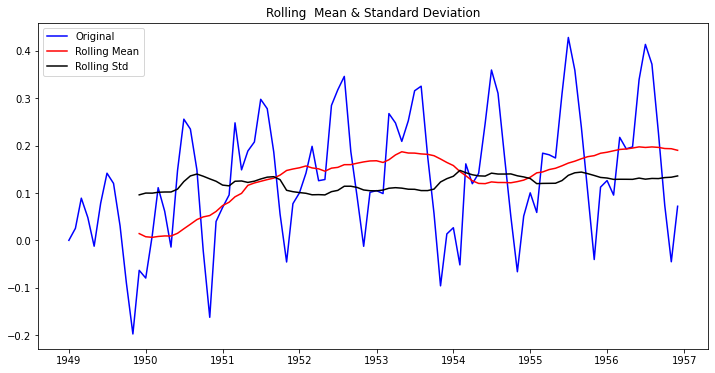

Results of Dickey-Fuller Test:
ADF Test Statistic             -2.835036
p-value                         0.053441
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [52]:
# Take the difference of the log of the time series and the exponential weighted moving average
exp_weighted_moving_avg_diff = train_log - exp_weighted_moving_avg

# Check test stationarity for the simple moving average technique
test_stationarity(exp_weighted_moving_avg_diff)

The rolling mean and standard deviation has less variation in magnitude as well.
The test statistic is smaller than 1% of the critical values, that means we can say that "with 99% confidence that this time series is stationary. The p-value is relatively less.

However, simple trend reduction techniques above **does not work** in cases with **high seasonality** like this one.

Let's try next technique that uses previous values of the time series (take the difference with a particular time lag).
This removes the trend as well as seasonality.

In [53]:
# 3. Previous values - Take the difference with a particular time lag
previous_values = pd.concat([train_log, train_log.shift()], axis = 1)

previous_values.columns = [['train_log', 'train_log.shift()']]
previous_values.head()

,train_log,train_log.shift()
Date,,
1949-01-01,4.718499,NaN
1949-02-01,4.770685,4.718499
1949-03-01,4.882802,4.770685
1949-04-01,4.859812,4.882802
1949-05-01,4.795791,4.859812


In [54]:
# Take the difference with a particular time lag. (Differencing with previous month value)
train_log_diffShift = train_log - train_log.shift()

previous_values['train_log_diffShift'] = train_log_diffShift
previous_values.head()

,train_log,train_log.shift(),train_log_diffShift
Date,,,
1949-01-01,4.718499,NaN,NaN
1949-02-01,4.770685,4.718499,0.052186
1949-03-01,4.882802,4.770685,0.112117
1949-04-01,4.859812,4.882802,-0.022990
1949-05-01,4.795791,4.859812,-0.064022


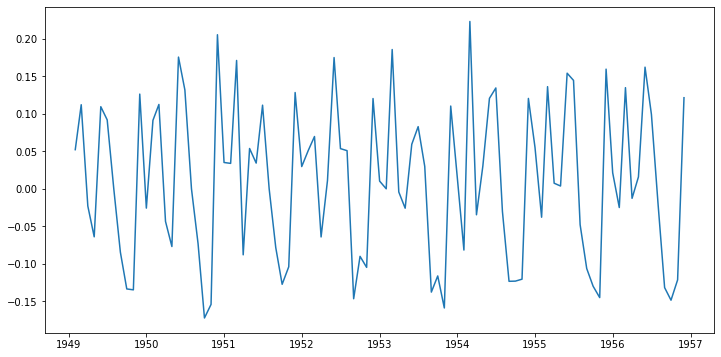

In [55]:
plt.plot(train_log_diffShift)

Here we have difference the time series once or differentiated the time series once, which means that order of difference is 1.

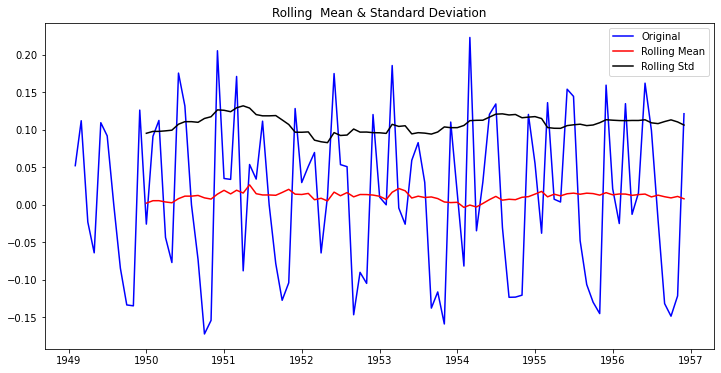

Results of Dickey-Fuller Test:
ADF Test Statistic             -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [56]:
# Drop the null values
train_log_diffShift.dropna(inplace = True)

# Check test stationarity for the previous value technique
test_stationarity(train_log_diffShift)

Here, there is no trend, the output is relatively flat. The ADF test statistic is less than 10% of the critical value, with 90% confidence that the time series is stationary. 

Now this series looks stationary on both mean and variance. The I or integrated part of our ARIMA model is equal to 1 as 1st difference.

Next, we decompose the time series into trend, seasonality and residual.

#####C. Seasonal Decomposition 


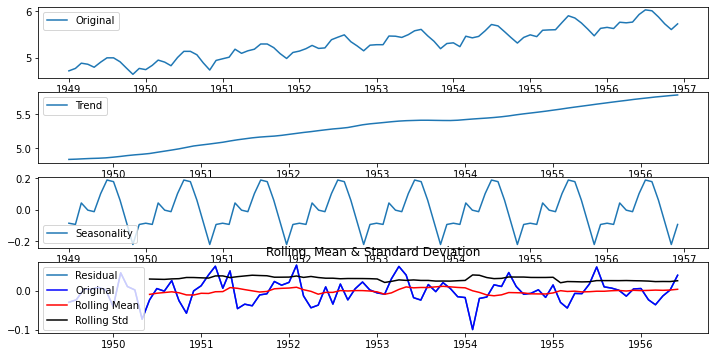

Results of Dickey-Fuller Test:
ADF Test Statistic            -5.907863e+00
p-value                        2.681970e-07
#Lags Used                     3.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


In [57]:
# Decompose into trend, seasonal and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_log, freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components of the time series
plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

train_log_decompose = residual
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose)


Above, the original data is decomposed into trend and seasonality. 

The trendline is linear and is upward trending. The seasonality shows a cycle of less 12 months pattern. The residual shows irregularity (noise) in the time series. It does not have a specific pattern.

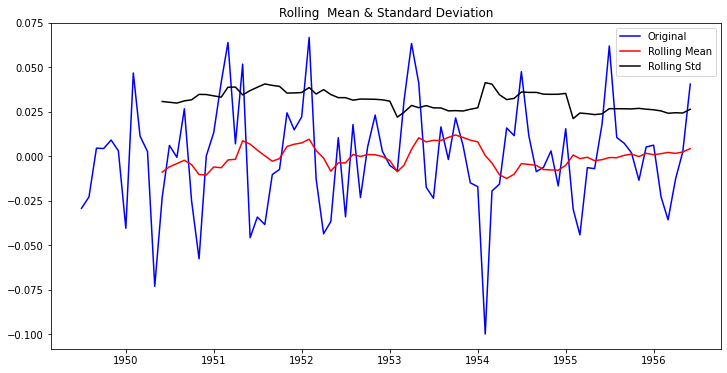

Results of Dickey-Fuller Test:
ADF Test Statistic            -5.907863e+00
p-value                        2.681970e-07
#Lags Used                     3.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64


In [58]:
# Check if the residual or noise is stationary or non stationary
train_log_decompose = residual
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose)

The irregularity of the time series is not stationary though the test statistic is significantly lower than the 1% critical value. 


ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average). ARIMA model is noted ARIMA(p,d,q) where p,d, and q are the levels for each of the AR, I, and MA parts. Each of these three parts is an effort to make the final residuals display a white noise pattern (or no pattern at all).

Integrated (I) – subtract time series with its lagged series to extract trends from the data

AutoRegressive (AR) – extract the influence of the previous periods’ values on the current period

Moving Average (MA) – extract the influence of the previous period’s error terms on the current period’s error

### Step 3: Plot ACF & PACF 
  - identify potential AR and MA model in the residuals

|**Autocorrelation factor (ACF)**  |   
|---|
|A good way to distinguish between signal and noise is ACF (AutoCorrelation Function), by finding the correlation between a series of its lagged values.     |
|Autocorrelation is the correlation of a series with its own lags. If a series is significantly autocorrelated, the previous values of the series (lags) may be helpful in predicting the current value.|  

<br>

|**Partial autocorrelation factor (PACF)**  |   
|---|
| Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags |  




In [59]:
# Create ACF and PACF plots
import warnings
# Specify to ignore warning messages
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diffShift, nlags=20)
lag_pacf = pacf(train_log_diffShift, nlags=20, method='ols')

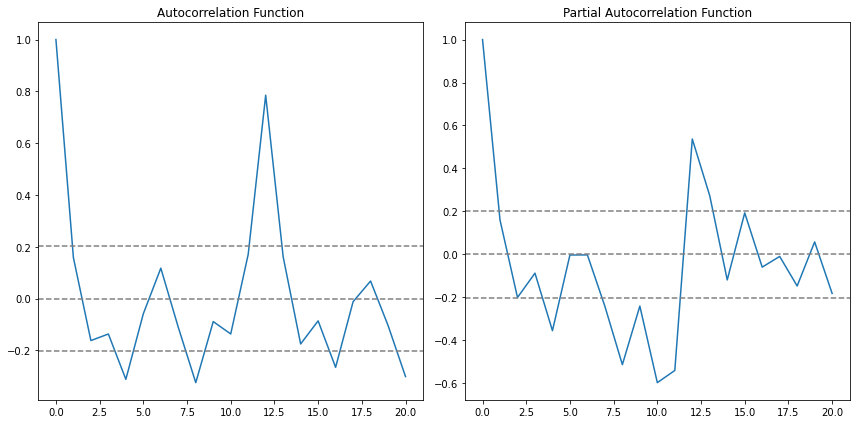

In [60]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(train_log_diffShift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train_log_diffShift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(train_log_diffShift)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train_log_diffShift)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() 

From the ACF plot, the curve cuts y=0.0 the first time, at about point 2, that makes q parameter value=2.

Also, the PACF plot, the curve cuts y=0.0 the first time at about point 2, that makes p parameter value=2. 

From the initial differencing (I) or d = 1.

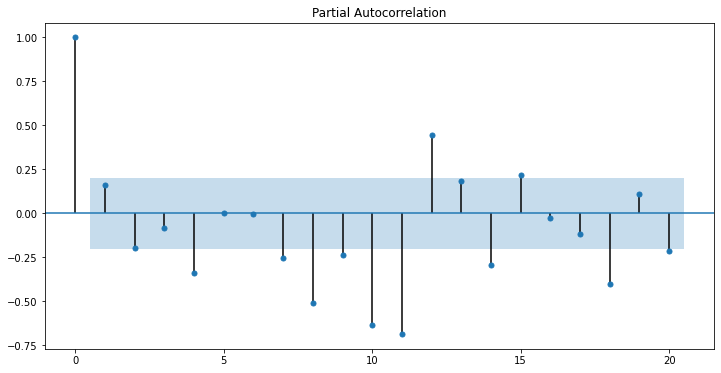

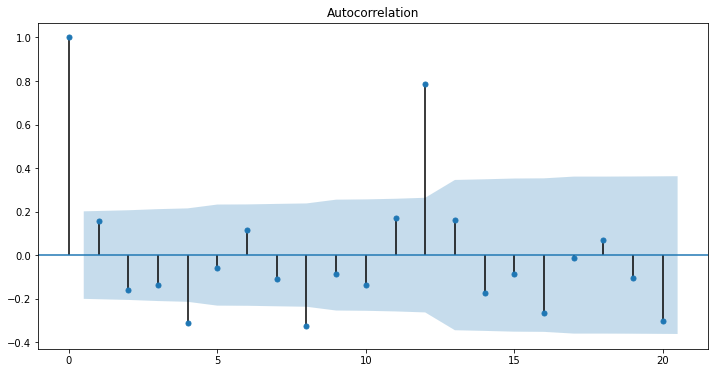

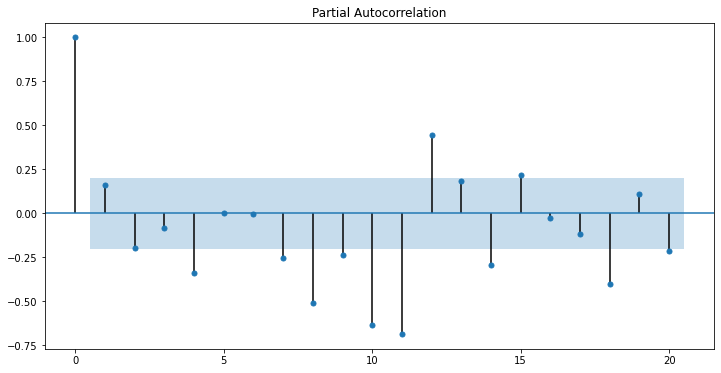

In [61]:
# Another method of plotting acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_log_diffShift, lags=20)
plot_pacf(train_log_diffShift, lags=20)

In [62]:
# Yet another method - Run several order combination of parameter order and output best performing
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(train_log_diffShift)

{'bic':             0           1           2
 0 -152.498811 -151.587391 -161.937148
 1 -150.347731 -157.418443 -166.103860
 2 -149.533761 -168.671244 -169.987641
 3 -145.667218 -165.244067 -165.854684
 4 -152.708882 -165.690475 -162.746528, 'bic_min_order': (2, 2)}

The best order indicated in this package above, 'bic_min_order' is (2, 2). This means AR(2) and MA(2).

Bayesian Information Criteria - BIC value is minimum for this given model

### Step 4: Build Model

##### AR Model




Next, we fit the ARIMA model to find the optimed value of p, d, q parameters.
We already know the value of d (differencing which is 1).
Now we need to find out the value of p and q.



Ploting AR Model


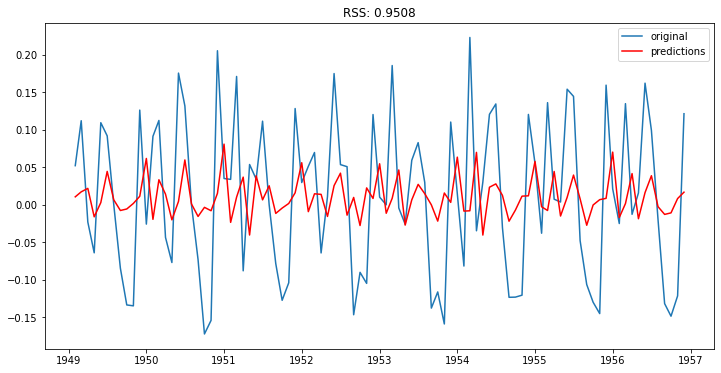

In [63]:
# AR Model - specifies that the output variable depends linearly on its own previous values.
# The q value = 0 for AR model
import warnings
# Specify to ignore warning messages
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima_model import ARIMA, ARMAResults
model = ARIMA(train_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(train_log_diffShift.dropna(), label ='original') 
plt.plot(results_AR.fittedvalues, color = 'red', label='predictions')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - train_log_diffShift)**2)) #Residual sum of squares
print('Ploting AR Model')
plt.legend(loc='best')
plt.show()

In [64]:
test.head(1), test.tail(1)

(            Num_of_Passengers
 Date                         
 1957-01-01                315,             Num_of_Passengers
 Date                         
 1960-12-01                432)

Ploting AR Model


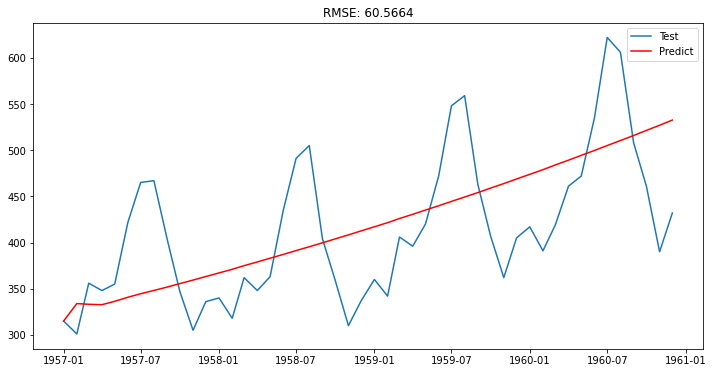

In [65]:
# Find the predictions for the fitted values - plot the validation curve for AR model
AR_predict = results_AR.predict(start = '1957-01-01' , end= '1960-12-01')
AR_predict = AR_predict.cumsum().shift().fillna(0)  
AR_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
AR_predict1 = AR_predict1.add(AR_predict, fill_value = 0) 
AR_predict = np.exp(AR_predict1)  

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(AR_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting AR Model')

##### MA Model

Text(0.5, 1.0, 'RSS: 0.8278')

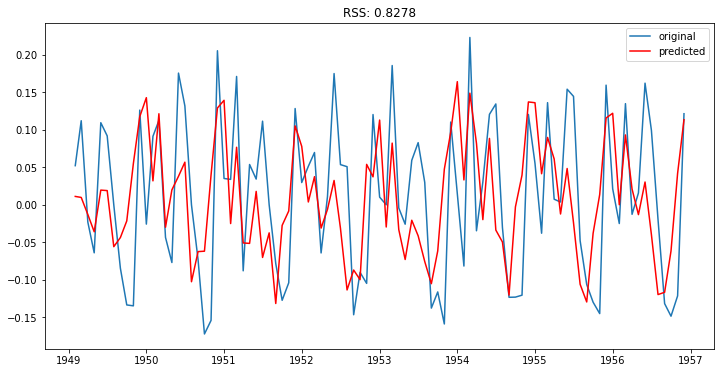

In [66]:
###  MA Model p = 0 in MA model
import warnings
# Specify to ignore warning messages
warnings.filterwarnings("ignore")

model = ARIMA(train_log, order= (0, 1, 2))  
results_MA = model.fit(disp = -1)  
plt.plot(train_log_diffShift.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color= 'red', label='predicted')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - train_log_diffShift)**2))

Ploting MA Model


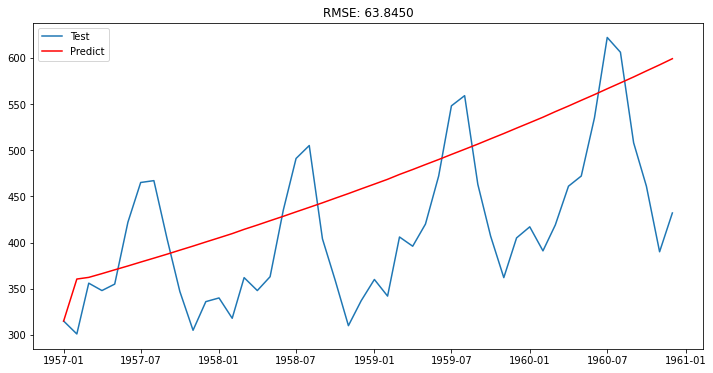

In [67]:
# Find the predictions for the fitted values - - plot the validation curve for MA model
MA_predict = results_MA.predict(start = '1957-01-01' , end= '1960-12-01')
MA_predict = MA_predict.cumsum().shift().fillna(0) 
MA_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
MA_predict1 = MA_predict1.add(MA_predict, fill_value = 0)  
MA_predict = np.exp(MA_predict1)  

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(MA_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting MA Model')

##### ARIMA Model AR + I + MA

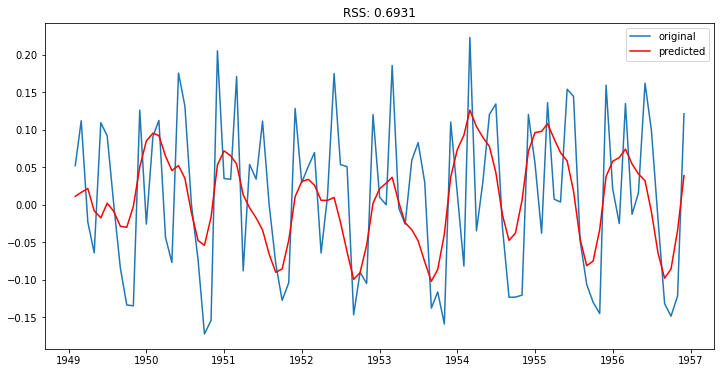

In [68]:
# Combined Model=> AR + I + MA
import warnings
# Specify to ignore warning messages
warnings.filterwarnings("ignore")

model = ARIMA(train_log, order = (2, 1, 2))  
results_ARIMA = model.fit(disp = -1)  
plt.plot(train_log_diffShift.dropna(), label = 'original')
plt.plot(results_ARIMA.fittedvalues, color= 'red', label='predicted')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - train_log_diffShift)**2))
plt.show()

Here the combined model of AR and MA gave the best result. 

The RSS value for AR model is 0.9508, for MA model is 0.8278 and for the combination model,the RSS value is 0.6931. much better. 

We can scale back to the original values to see how it performs.

Ploting ARIMA Model


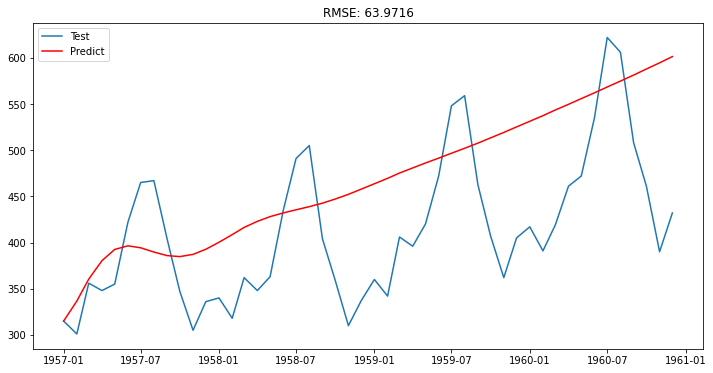

In [69]:
# Find the predictions for the fitted values 
ARIMA_predict = results_ARIMA.predict(start = '1957-01-01' , end= '1960-12-01')
ARIMA_predict = ARIMA_predict.cumsum().shift().fillna(0) 
ARIMA_predict1 = pd.Series(np.ones(test.shape[0]) * np.log(test['Num_of_Passengers'])[0], index = test.index)
ARIMA_predict1 = ARIMA_predict1.add(ARIMA_predict, fill_value = 0) 
ARIMA_predict = np.exp(ARIMA_predict1) 

plt.plot(test['Num_of_Passengers'], label ='Test')
plt.plot(ARIMA_predict, color = 'red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ARIMA_predict, test['Num_of_Passengers']))/test.shape[0]))
print('Ploting ARIMA Model')

In [70]:
print(results_ARIMA.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Num_of_Passengers   No. Observations:                   95
Model:                  ARIMA(2, 1, 2)   Log Likelihood                  98.655
Method:                        css-mle   S.D. of innovations              0.083
Date:                 Sun, 04 Oct 2020   AIC                           -185.311
Time:                         02:38:16   BIC                           -169.988
Sample:                     02-01-1949   HQIC                          -179.119
                          - 12-01-1956                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0113      0.000     30.431      0.000       0.011       0.012
ar.L1.D.Num_of_Passengers     1.4438      0.094     15.384      0.000       1.

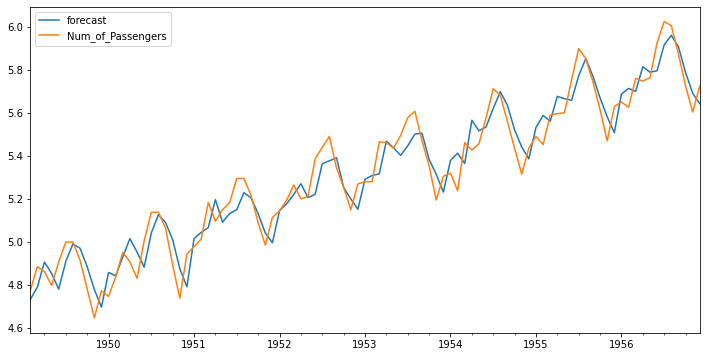

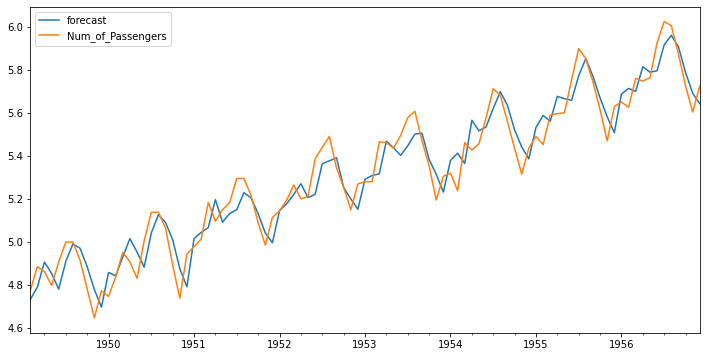

In [71]:
# Check accuracy of the model visually
results_ARIMA.plot_predict()

Predictions and Reverse Transformation

In [72]:
# Get the prediction values (Convert the fitted values into series format and store the predicted results)
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
1949-02-01    0.011261
1949-03-01    0.016603
1949-04-01    0.021664
1949-05-01   -0.008096
1949-06-01   -0.017396
dtype: float64

Note, that the predications here are in the transformed state, **log_differenced**. For us to see those values close to the initial log value we started with, let's do some mathematical procedure.


In [73]:
# Convert the predictions to cumulative sum (cumsum)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
1949-02-01    0.011261
1949-03-01    0.027864
1949-04-01    0.049527
1949-05-01    0.041431
1949-06-01    0.024035
dtype: float64

In [74]:
# Add the cumsum to the log value (Convert the log_differenced value by adding these differences consecutively to the base number)
predictions_ARIMA_log = pd.Series(train_log.iloc[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1949-01-01    4.718499
1949-02-01    4.729760
1949-03-01    4.746363
1949-04-01    4.768026
1949-05-01    4.759930
dtype: float64

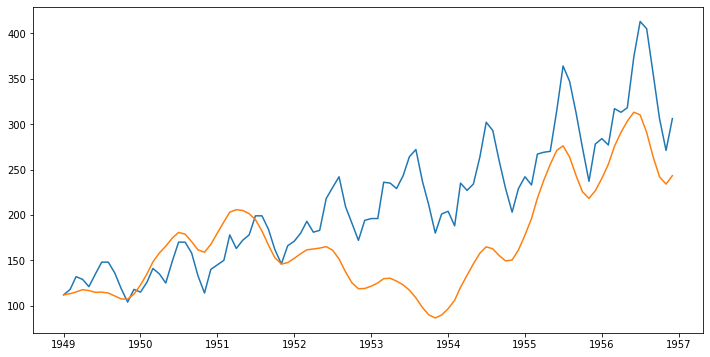

In [75]:
# Calculate the exponential of the value to get the data into the original data
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.plot(train)
plt.plot(predictions_ARIMA)

#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - train))) #>>>>>>> error, need to work on this

In [76]:
# Print the dataset
airline['Num_of_Passengers'].size

144

### Step 5: Forecast a Time Series

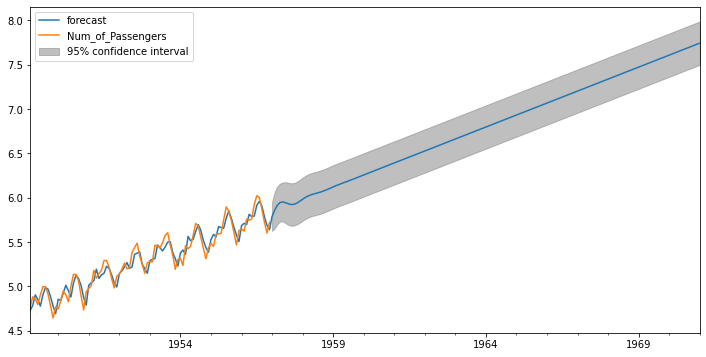

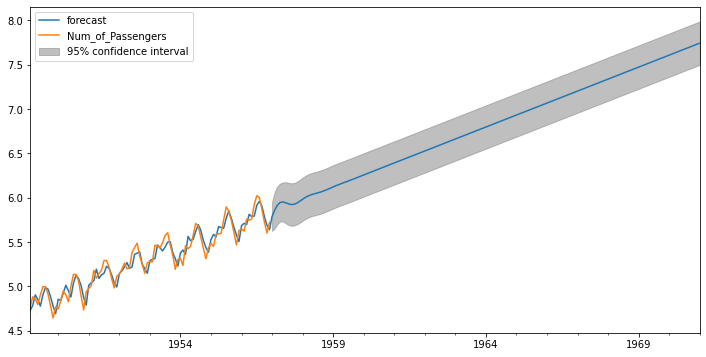

In [77]:
# Forcast for next 10 years (120 months) (144+120 = 264)
results_ARIMA.plot_predict(1,264)


In [78]:
# Print values for next 10 years
next_ten_years_forecast=results_ARIMA.forecast(steps =120)
print(next_ten_years_forecast[1])

[0.08321318 0.10429693 0.10874115 0.10874503 0.11125876 0.11613255
 0.120226   0.12202927 0.12227477 0.12233669 0.12284875 0.12357426
 0.124083   0.12425649 0.12426417 0.12429433 0.12439283 0.12450026
 0.12456122 0.12457565 0.12457567 0.12458438 0.12460164 0.12461663
 0.12462336 0.12462427 0.12462452 0.12462647 0.12462924 0.12463118
 0.12463184 0.12463187 0.12463199 0.12463237 0.12463279 0.12463302
 0.12463308 0.12463308 0.12463311 0.12463318 0.12463324 0.12463326
 0.12463326 0.12463327 0.12463327 0.12463328 0.12463329 0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.1246333  0.1246333  0.1246333  0.1246333  0.1246333  0.1246333
 0.

In [79]:
# Get forcast in orignal data
np.exp(next_ten_years_forecast[1])

array([1.08677346, 1.10992998, 1.11487373, 1.11487806, 1.11768408,
       1.12314473, 1.12775169, 1.12978717, 1.13006456, 1.13013455,
       1.13071338, 1.13153403, 1.13210983, 1.13230625, 1.13231496,
       1.1323491 , 1.13246065, 1.13258232, 1.13265136, 1.13266771,
       1.13266773, 1.13267759, 1.13269714, 1.13271413, 1.13272175,
       1.13272278, 1.13272306, 1.13272527, 1.13272841, 1.1327306 ,
       1.13273135, 1.13273138, 1.13273152, 1.13273195, 1.13273242,
       1.13273269, 1.13273276, 1.13273276, 1.13273279, 1.13273287,
       1.13273293, 1.13273296, 1.13273296, 1.13273296, 1.13273297,
       1.13273299, 1.132733  , 1.132733  , 1.132733  , 1.132733  ,
       1.132733  , 1.132733  , 1.132733  , 1.132733  , 1.132733  ,
       1.132733  , 1.132733  , 1.132733  , 1.132733  , 1.132733  ,
       1.132733  , 1.132733  , 1.132733  , 1.132733  , 1.132733  ,
       1.132733  , 1.132733  , 1.132733  , 1.132733  , 1.132733  ,
       1.132733  , 1.132733  , 1.132733  , 1.132733  , 1.13273

### SARIMA - Seasonal ARIMA

Since, we have a strong seasonality in the time series, let's go ahead to use seasonal ARIMA instead of ARIMA.
SARIMA models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level. Seasonal ARIMA has 7 parameters, 3 for ARIMA and 4 for the seasonal components (same as in ARIMA but the last one is seasonlity frequency.
(p,d,q) * (P,D,Q,F))


In [80]:
# Take the log transform of the series to scale to remove unequal variance 
airline_log = np.log(airline['Num_of_Passengers']) 

1. Select Parameters for model

In [81]:
import itertools
# Here we define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(2) 

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))  

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]      

In [82]:
# Select the best fit model parameters
import statsmodels.api as sm
import warnings
# Specify to ignore warning messages
warnings.filterwarnings("ignore")           

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(airline_log, 
                                            order = param, 
                                            seasonal_order = param_seasonal, 
                                            enforce_stationarity = False, 
                                            enforce_invertibility = False)
            results = temp_model.fit()
            
            print('SARIMAX{}x{}-AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
              best_aic = results.aic
              best_pdq = param
              best_seasonal_pdq = param_seasonal

        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)-AIC:898.7367486840988
SARIMAX(0, 0, 0)x(0, 0, 1, 12)-AIC:687.3749017314517
SARIMAX(0, 0, 0)x(0, 1, 0, 12)-AIC:-150.62577301420401
SARIMAX(0, 0, 0)x(0, 1, 1, 12)-AIC:-179.24122974055126
SARIMAX(0, 0, 0)x(1, 0, 0, 12)-AIC:-344.53629719317615
SARIMAX(0, 0, 0)x(1, 0, 1, 12)-AIC:-342.6089190943791
SARIMAX(0, 0, 0)x(1, 1, 0, 12)-AIC:-225.90869208626526
SARIMAX(0, 0, 0)x(1, 1, 1, 12)-AIC:-301.4604586749726
SARIMAX(0, 0, 1)x(0, 0, 0, 12)-AIC:704.0097395065307
SARIMAX(0, 0, 1)x(0, 0, 1, 12)-AIC:509.2224730088748
SARIMAX(0, 0, 1)x(0, 1, 0, 12)-AIC:-254.34077342089364
SARIMAX(0, 0, 1)x(0, 1, 1, 12)-AIC:-248.42231759659612
SARIMAX(0, 0, 1)x(1, 0, 0, 12)-AIC:-396.27944663110634
SARIMAX(0, 0, 1)x(1, 0, 1, 12)-AIC:-395.7137229926908
SARIMAX(0, 0, 1)x(1, 1, 0, 12)-AIC:-271.43122716109525
SARIMAX(0, 0, 1)x(1, 1, 1, 12)-AIC:-339.4992871491626
SARIMAX(0, 1, 0)x(0, 0, 0, 12)-AIC:-230.04132958357417
SARIMAX(0, 1, 0)x(0, 0, 1, 12)-AIC:-296.9570921223847
SARIMAX(0, 1, 0)x(0, 1,

For each combination of parameters (p,d,q), it fit a new seasonal ARIMA model with the SARIMAX() function and assess AIC.

Akaike Information Criterion (AIC) - balances the model between goodness-of-fit and number of parameters used in the model. 

AIC=2K−2ln(L)

For the given model, L is the maximized value of the likelihood function representing goodness-of-fit, and K the number of estimated parameters. It measures the trade-off of model_fit and complexity of model.

With increasing parameters, K will increase and hence AIC increases. While with the goodness of the fit L increases thus decreasing AIC.

2. Fit an ARIMA Time Series Model
to make predictions

In [83]:
# Fit the model as per the lowest aic
model = sm.tsa.statespace.SARIMAX(airline_log, order = (1,0,1), seasonal_order = (1,0,1,12), enforce_stationarity = False, enforce_invertibility = False)
results = model.fit()
print(results.summary())
#print(results.summary().tables[1])


                                 Statespace Model Results                                 
Dep. Variable:                  Num_of_Passengers   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 243.810
Date:                            Sun, 04 Oct 2020   AIC                           -477.619
Time:                                    02:38:37   BIC                           -463.282
Sample:                                01-01-1949   HQIC                          -471.794
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.039     24.105      0.000       0.865       1.019
ma.L1         -0.3804      0.093   

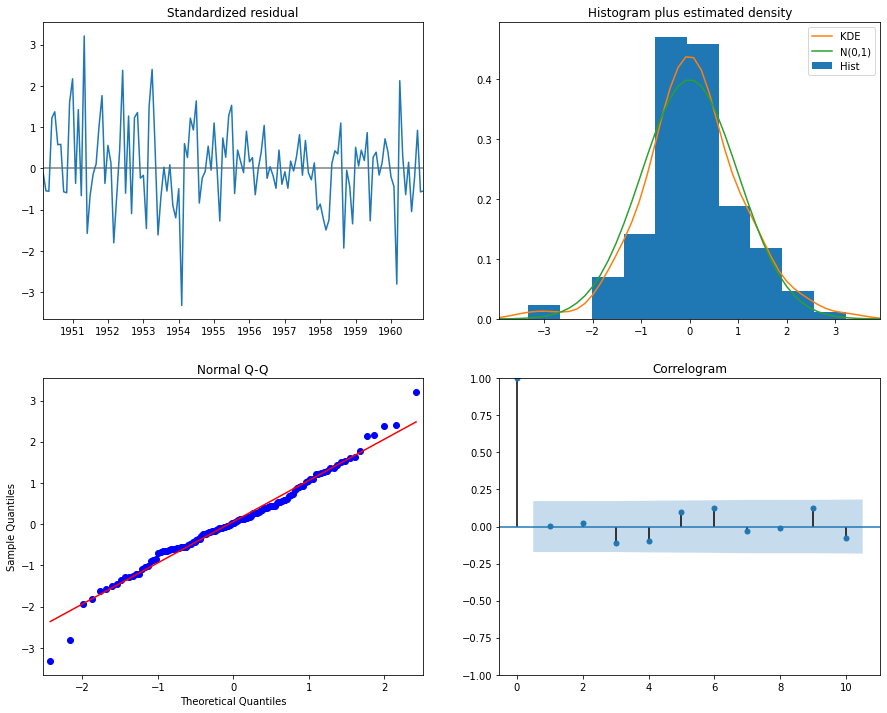

In [84]:
# Generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(15, 12))    
plt.show()

3. Validate Forecasts

In [85]:
#Obtain values for forecasts of the time series from 1957
pred = results.get_prediction(start = pd.to_datetime('1957-01-01'), dynamic = False, full_results = True)

#Obtain associated confidence intervals for forecasts of the time series
pred_ci = pred.conf_int()
pred_ci.head()

,lower Num_of_Passengers,upper Num_of_Passengers
1957-01-01,5.684178,5.826824
1957-02-01,5.653278,5.795921
1957-03-01,5.797159,5.939792
1957-04-01,5.783142,5.925774
1957-05-01,5.790311,5.932943


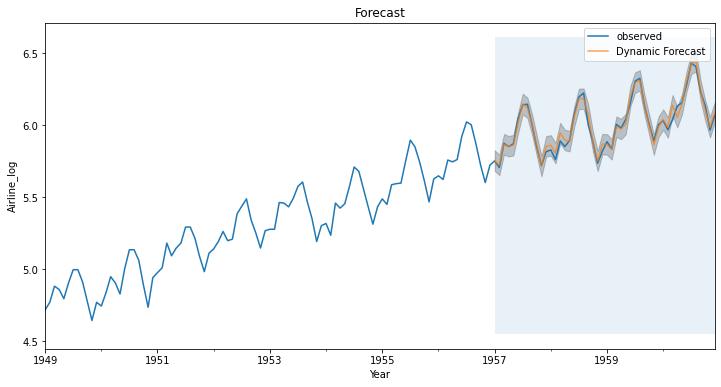

In [86]:
#Plot the forecasted values with historical data
ax = airline_log['1949':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'Dynamic Forecast', alpha = 0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1957-01-01'), airline_log.index[-1], alpha = .1, zorder = -1)
plt.xlabel('Year')
plt.ylabel('Airline_log')
plt.title('Forecast')
plt.legend()

In [87]:
# Predictions
pred.predicted_mean.head()

1957-01-01    5.755501
1957-02-01    5.724599
1957-03-01    5.868475
1957-04-01    5.854458
1957-05-01    5.861627
Freq: MS, dtype: float64

In [88]:
# Calculate the RMSE
airline_log_forecasted = pred.predicted_mean     #From 1957 to 1960 (validation process)
airline_log_original = airline_log['1957-01-01':]
rmse = np.sqrt((airline_log_forecasted - airline_log_original) ** 2).mean()  #Mean square error
print('Root Mean Squared Error of forecast : {}'.format(round(rmse,3)))

Root Mean Squared Error of forecast : 0.023


4. Produce and Visualize Forecasts

In [89]:
# From prediction, get ci confidence interval
pred_uc = results.get_forecast(steps=100)     #Get forecast 100 steps ahead in future (airline_log)
pred_ci = pred_uc.conf_int()                  #Get confidence intervals of forecasts (airline_log)
pred_ci.head()

,lower Num_of_Passengers,upper Num_of_Passengers
1961-01-01,6.045088,6.187713
1961-02-01,5.978745,6.142316
1961-03-01,6.097817,6.277943
1961-04-01,6.119984,6.313616
1961-05-01,6.151032,6.355903


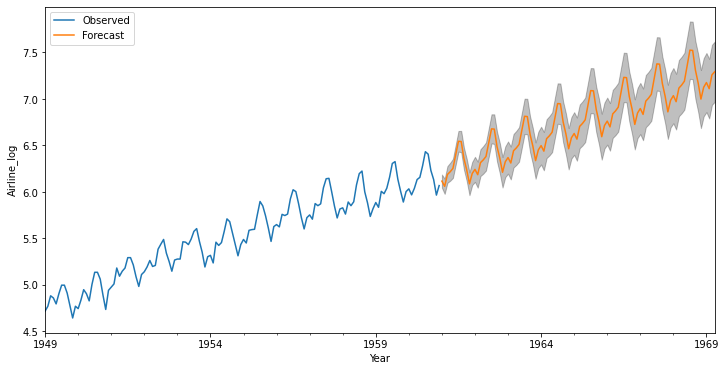

In [90]:
# Plot the forescasted values and confidence intervals
ax = airline_log['1949':].plot(label='Observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Airline_log')
plt.legend(loc = 'upper left')
plt.show()

Back to original data

In [91]:
#Take exponential function to get the original data
pred_uc = np.exp(pred_uc.predicted_mean)
pred_ci = np.exp(pred_ci)

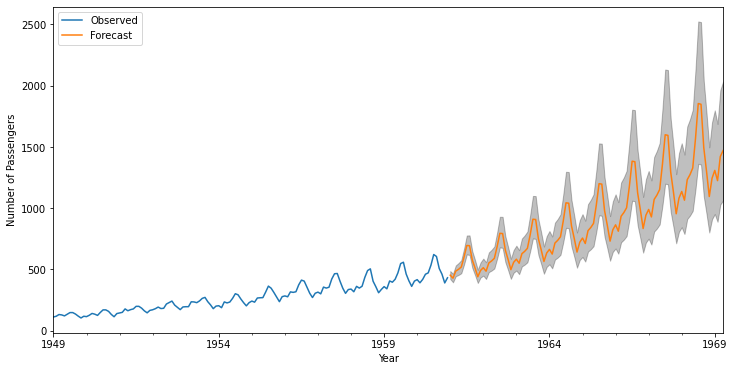

In [92]:
#Plot original data with forescasted values and confidence intervals
ax = airline.Num_of_Passengers['1949':].plot(label='Observed')
pred_uc.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Passengers')
plt.legend(loc = 'upper left')
plt.show()

### Conclusion

* We explored, visualized the time series, checked for outlier, missing values and observed the trend and variance
* Reviewed the naive and smoothing models
* Made the series stationary - Transformed the data using log and differencing and check for stationarity including Seasonal Deomposition
* Plotted and examined Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF) to determime the input parameters
* Use the properties of ACF and PACF as a guide to estimate models and select appropriate p, d and q and AIC values
* Built and fit ARIMA family models - AutoRegrssive Model (AR) model, Moving Average (MA) model, ARIMA model and Seasonal ARIMA 
* Estimated the model and forecasted values for the next 10 year period
* Calculated RMSE - to check the perfomance of the model

* SARIMA model, we also checked the diagnostics, to ensure our model fit well,that residual from the model resembles a white noise process


### References

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

https://www.statsmodels.org/dev/user-guide.html#time-series-analysis

### Home Work

[Electircity Consumption Forecast](https://www.kaggle.com/shenba/time-series-datasets)